# Numerical Recipes Workshop 1
For the week of 23-27 September, 2019

These activities will start with a small Python/NumPy refresher and then cover some things related to lectures 1/2 and the first part of Checkpoint 1.

**Please hand in your notebook via Noteable at the end of the workshop.**

They will not be graded and you will not receive feedback on them, but we want to test the submission process to make sure it's working for the checkpoints.

Please spend the first hour of the workshop with this notebook before starting on the checkpoint. **TAs will not answer questions about the checkpoints until the second hour of the workshop.**

## Documentation
* Python: https://docs.python.org/3.7/
* NumPy: https://numpy.org/doc/1.17/user/index.html
* SciPy: https://docs.scipy.org/doc/scipy/reference/
* matplotlib: https://matplotlib.org/3.1.0/index.html

Advice: google is really helpful (e.g. "numpy trapezoid rule")

## Python/package Versions

It's good to know what versions of Python and various packages you're using. Answers can be different or known bugs may exist in specific versions.

Use sys package for Python version. Most external packages have a `__version__` attribute associated with the top level import.

In [1]:
# Python version
import sys
print(sys.version)
# Scipy version
import scipy
print(scipy.__version__)
# Try numpy and matplotlib

3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:01:00) 
[GCC 7.3.0]
1.3.1


## The two most useful functions in Python
* `dir` - list all names (variables, functions, etc) in the given scope, i.e., what's in here? Try the following:
```
# top level name space
dir()
x = 1
dir()
```
```
import sys
# contents of the sys module
dir(sys)
```

* `help` - show documentation for a function or object.
```
import numpy as np
help(np.sum)
```

#### Use `dir` to see what's in the NumPy module. Pick a random function and see what it does.

In [17]:
import numpy as np
dir(np)
help(np.iinfo)

Help on class iinfo in module numpy:

class iinfo(builtins.object)
 |  iinfo(int_type)
 |  
 |  iinfo(type)
 |  
 |  Machine limits for integer types.
 |  
 |  Attributes
 |  ----------
 |  bits : int
 |      The number of bits occupied by the type.
 |  min : int
 |      The smallest integer expressible by the type.
 |  max : int
 |      The largest integer expressible by the type.
 |  
 |  Parameters
 |  ----------
 |  int_type : integer type, dtype, or instance
 |      The kind of integer data type to get information about.
 |  
 |  See Also
 |  --------
 |  finfo : The equivalent for floating point data types.
 |  
 |  Examples
 |  --------
 |  With types:
 |  
 |  >>> ii16 = np.iinfo(np.int16)
 |  >>> ii16.min
 |  -32768
 |  >>> ii16.max
 |  32767
 |  >>> ii32 = np.iinfo(np.int32)
 |  >>> ii32.min
 |  -2147483648
 |  >>> ii32.max
 |  2147483647
 |  
 |  With instances:
 |  
 |  >>> ii32 = np.iinfo(np.int32(10))
 |  >>> ii32.min
 |  -2147483648
 |  >>> ii32.max
 |  2147483647
 |  
 

## Best Practices

* Put module imports at the top in the first code cell.
* Rename modules to keep names short.
```
# Too long!
import numpy
x = numpy.arange(10)
```
```
# Much better
import numpy as np
x = np.arange(10)
```
* Don't do `from MODULE import *`. Every available object will be in your namespace.
```
from scipy import *
dir() # aaah!
```
* Be careful with variable names. Just about everything can be overwritten.
```
dir = 5
dir()
# The dir function is now lost. Doom.
```
* Use tab completion to recall function/object names. Start typing something and hit the [tab] key a couple times to bring up a menu of matching options. Use this in the terminal, too. Don't waste time typing long names.
```
np.su[tab][tab]
```
* If things are getting messy, restart the kernel using one of the *Restart* commands in the *Kernel* menu. This will reset your session, removing bad imports and extra variables.
* Cell taking too long to run? From *Kernel* menu, click *Interrupt* to stop execution. Have a look at the traceback to see where the code was. This can give a hint as to why it's taking so long.
* Keep it neat. Someone is most likely going to have to read your code someday. It should look nice, be clear, and conform to the style of code that was already there.

### Plotting tips
* add `%matplotlib inline` your import cell to get plots to show up in the notebook
```
from matplotlib import pyplot as plt
%matplotlib inline
```
* add the following in a separate cell to make defautl plot and font sizes bigger
```
pyplot.rcParams['figure.figsize'] = (10, 6) # inches
pyplot.rcParams['font.size'] = 14
```

# Activities

## Integer and floating point precision
Not all programming languages have fancy [arbitrary precision integers](https://rushter.com/blog/python-integer-implementation/). NumPy arrays of integers and floats will have limited precision.

#### Integer types
* `np.int8`, `np.int16`, `np.int32`, `np.int64`
* `np.uint8`, `np.uint16`, `np.uint32`, `np.uint64`

#### Floating point types
* `np.float16`, `np.float32`, `np.float64`, `np.float128`

Use the `np.iinfo` (for ints) and `np.finfo` (for floats) commands to see the limitations of some of these variable types, i.e. what do you get from `np.iinfo(np.int32)`?

In [ ]:
import numpy as np

In [29]:
np.iinfo(np.int8)
np.finfo(np.float32)


finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

See what happens when an upper or lower limit is exceeded. Try a few different types.

In [26]:
# code inverts to the minimum value it can represent
# np.int9 min = -128 max = 127
x = np.array([125, 126, 127], dtype=np.int8)
print(x)
x += 1
print(x)

[125 126 127]
[ 126  127 -128]


Floating point numbers have an attribute called *resolution*. Demonstrate the meaning of this term with the array below.

In [33]:
y = np.array([1000, 100, 10, 1, 0.1], dtype=np.float32)
print(y)
y += 1e-08
print(y)



[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01]
[1.0000000e+03 1.0000000e+02 1.0000000e+01 1.0000000e+00 1.0000001e-01]


## NumPy arrays: why bother?
NumPy arrays can be manipulated all at once without having to explicitly iterate over each value. NumPy operations are also significantly faster.

In [ ]:
import time

In [ ]:
# with lists
z = list(range(10000000))

t1 = time.time()
for i in range(len(z)):
    z[i] += 1
t2 = time.time()
print("That took %f seconds." % (t2-t1))

In [ ]:
# with arrays
z = list(range(10000000))
za = np.array(z)

t1 = time.time()
za += 1
t2 = time.time()
print("That took %f seconds." % (t2-t1))

### Some useful NumPy array generator functions.
* `np.arange`
* `np.linspace`
* `np.logspace`
* `np.ones`, `np.ones_like`
* `np.zeros`, `np.zeros_like`

Try them out. Feel free to make notes for yourself.

In [68]:
import numpy as np

# makes a 1D array with evenly spaced
x = np.arange(-5,6)
print(x)

# 2nd argument is the end and 3rd argument is spacing
y = np.arange(0,10,2)
print(y)

# will give a 1D array with 50 evenly spaced numbers between 2 and 20
# can add 3rd argument num = * to change number of items in array
z = np.linspace(2,20)
print(z)

# same as above but using logarithms
# can add extra arguments in order to modify base
a = np.logspace(2,20,num=20,base=10.0)
print(a)




[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[0 2 4 6 8]
[ 2.          2.36734694  2.73469388  3.10204082  3.46938776  3.83673469
  4.20408163  4.57142857  4.93877551  5.30612245  5.67346939  6.04081633
  6.40816327  6.7755102   7.14285714  7.51020408  7.87755102  8.24489796
  8.6122449   8.97959184  9.34693878  9.71428571 10.08163265 10.44897959
 10.81632653 11.18367347 11.55102041 11.91836735 12.28571429 12.65306122
 13.02040816 13.3877551  13.75510204 14.12244898 14.48979592 14.85714286
 15.2244898  15.59183673 15.95918367 16.32653061 16.69387755 17.06122449
 17.42857143 17.79591837 18.16326531 18.53061224 18.89795918 19.26530612
 19.63265306 20.        ]
[1.00000000e+02 8.85866790e+02 7.84759970e+03 6.95192796e+04
 6.15848211e+05 5.45559478e+06 4.83293024e+07 4.28133240e+08
 3.79269019e+09 3.35981829e+10 2.97635144e+11 2.63665090e+12
 2.33572147e+13 2.06913808e+14 1.83298071e+15 1.62377674e+16
 1.43844989e+17 1.27427499e+18 1.12883789e+19 1.00000000e+20]


## Plotting
Some useful plotting commands:
* `plt.plot`
* `plt.semilogx`, `plt.semilogy`
* `plt.loglog`
* `plt.scatter`
* `plt.xlim`, `plt.ylim`
* `plt.xlabel`, `plt.ylabel`
* `plt.legend`
* `plt.title`
* `plt.xscale`, `plt.yscale`

See [here](https://matplotlib.org/api/pyplot_summary.html) for a list of all plotting commands.

When making plots for checkpoints, always label the axes. Make them look nice.

A Gaussian distribution with mean, $\mu$, and variance, $\sigma^2$, takes the form:

$
\begin{align}
\Large
f(x) = \frac{1}{2\pi\sigma^{2}} e^{-\frac{(x - \mu)^2}{2\sigma^{2}}}
\end{align}
$

Make a plot of this function over the range [-5, 5] for a couple values of $\mu$ and $\sigma$ with appropriate labels and a legend. Hint, the `label` keyword can be given to the plotting commands to aid in making the legend. Try different combinations of linear and log-space plots.

First, code up a function for the Gaussian distribution. We'll use it here and there.

In [135]:
def my_gaussian(x, mu=0, sigma=1):
    # np.exp can act on entire arrays! woo!
    y = 1/np.sqrt((2*np.pi*(sigma)**2))*np.exp(-(x-mu)**2/(2*(sigma)**2))
    return y

Running the cell below will test your function with a few values.

In [117]:
assert (my_gaussian(0) - 0.3989422804014327 < 1e-7)
assert (my_gaussian(1) - 0.24197072451914337 < 1e-7)

In [118]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [76]:
plt.rcParams['figure.figsize'] = (10, 6) # inches
plt.rcParams['font.size'] = 14

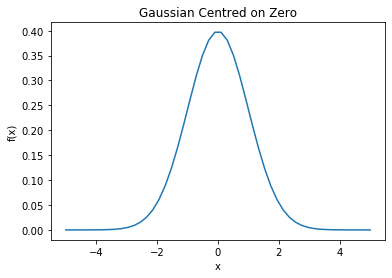

In [161]:
x = np.linspace(-5,5, num = 50)
y = my_gaussian(x)

# Plots
plt.title("Gaussian Centred on Zero")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

## Integration
Simple integration/summation can be done with basic array operations, i.e., not using fancy integration functions. Some useful functions:
* `np.sum`, `np.cumsum`

Note, many operations available directly from an array:
```
x = np.array([0, 1])
print (x.sum())
print (x.cumsum())
print (x.mean(), x.min(), x.max(), x.size)
```

Scipy has many [useful integration functions](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

To import one of those, you'll need to do:
```
from scipy.integrate import FUNCTION
```

Note, some of the scipy integrators require a function be given as one of the arguments. Other expect arrays of values. Read their documentation.

Integrate the Gaussian distribution from -5$\sigma$ to +5$\sigma$ using a few of the integration functions, like the trapezoidal rule and Simpson's rule. How quickly do the answers converge as a function of the number of points used?

Bonus: approximations like the trapezoidal rule and Simpson's rule can be coded up as vector operations in a few lines. Try this if you feel like.

In [162]:
from scipy.integrate import trapz
from scipy.integrate import simps

# x is already from 5sigma
integral_t = trapz(y,x)
integral_s = simps(y,x)
print(integral_t)
print(integral_s)



0.9999993758704986
0.9999994627045221


In [156]:
print(y)

[1.48671951e-06 1.56294518e-06 1.64291438e-06 1.72680223e-06
 1.81479157e-06 1.90707332e-06 2.00384677e-06 2.10531999e-06
 2.21171010e-06 2.32324372e-06 2.44015731e-06 2.56269761e-06
 2.69112199e-06 2.82569895e-06 2.96670852e-06 3.11444274e-06
 3.26920615e-06 3.43131624e-06 3.60110404e-06 3.77891458e-06
 3.96510749e-06 4.16005756e-06 4.36415530e-06 4.57780761e-06
 4.80143840e-06 5.03548920e-06 5.28041992e-06 5.53670947e-06
 5.80485658e-06 6.08538047e-06 6.37882168e-06 6.68574289e-06
 7.00672970e-06 7.34239154e-06 7.69336257e-06 8.06030255e-06
 8.44389784e-06 8.84486240e-06 9.26393876e-06 9.70189908e-06
 1.01595463e-05 1.06377152e-05 1.11372736e-05 1.16591234e-05
 1.22042022e-05 1.27734842e-05 1.33679815e-05 1.39887459e-05
 1.46368699e-05 1.53134881e-05 1.60197791e-05 1.67569666e-05
 1.75263212e-05 1.83291622e-05 1.91668589e-05 2.00408326e-05
 2.09525584e-05 2.19035668e-05 2.28954459e-05 2.39298433e-05
 2.50084680e-05 2.61330924e-05 2.73055547e-05 2.85277610e-05
 2.98016873e-05 3.112938